# This notebook is intended for visualizing ALL the scores

In [8]:
from numpy.lib.format import open_memmap
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import random

In [9]:
# hoo_path = 'test_TRAK_hoo.mmap' # jyh: your path here
# val_path = 'test_TRAK_val.mmap' # jyh: your path here

In [10]:
_scores_val = open_memmap('test_TRAK_val.mmap')
_scores_hoo = open_memmap('test_TRAK_hoo.mmap')
_scores_val_001 = open_memmap('test_TRAK_val_0_0_1.mmap')
_scores_val_005 = open_memmap('test_TRAK_val_0_0_5.mmap')
_scores_val_01 = open_memmap('test_TRAK_val_0_1.mmap')

# Flattend, raw scores

In [11]:
def get_raw(scores):
    values = []
    for i in range(len(scores)):
        sc = scores[i]
        for j in range(len(sc)):
            values.append(sc[j])
    return values

In [12]:
# import random

# def get_raw_randomized(eval_by_train, num_scores_per_eval):
#   """
#   Function that gets randomized TRAK scores (useful for plotting sparser histograms)
#   """
#   values=[]
#   len_eval = len(eval_by_train)
#   for i in range(len_eval): # for each eval point
#       trak_scores = random.sample(list(eval_by_train[i]), num_scores_per_eval) # randomly pick out 1000 trak scores for each eval point.
#       for j in range(len(trak_scores)):
#           values.append(trak_scores[j])
#   return values

In [13]:
# val_rand = get_raw_randomized(_scores_val,1000)

In [14]:
val_scores_raw = get_raw(_scores_val)
val_scores_raw_001 = get_raw(_scores_val_001)
val_scores_raw_005 = get_raw(_scores_val_005)
val_scores_raw_01 = get_raw(_scores_val_01)
hoo_scores_raw = get_raw(_scores_hoo)

In [ ]:
# change range for viz
range_min = -0.0001
range_max = 0.0001

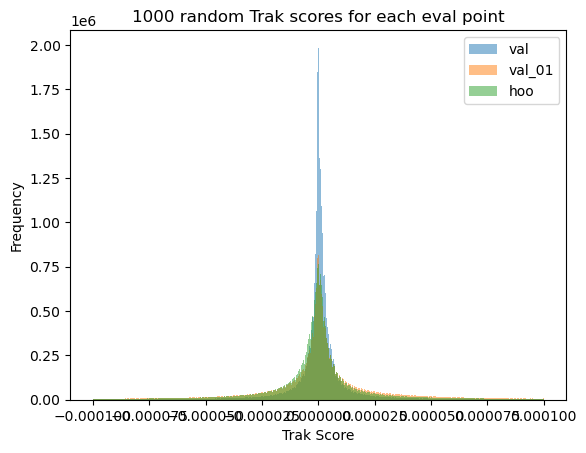

In [19]:
plt.hist(val_scores_raw,bins=500,range = (range_min, range_max),alpha=0.5,label = "val")
plt.hist(val_scores_raw_001,bins=500,range = (range_min, range_max),alpha=0.5,label = "val_001")
plt.hist(val_scores_raw_005,bins=500,range = (range_min, range_max),alpha=0.5,label = "val_005")
plt.hist(val_scores_raw_01,bins=500,range = (range_min, range_max),alpha=0.5,label = "val_01")
plt.hist(hoo_scores_raw,bins=500,range = (range_min, range_max),alpha=0.5, label = "hoo")

# Add labels and title
plt.xlabel('Trak Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of flattened, raw Val and Hoo TRAK scores \n in range ({range_min},{range_max})')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
plt.savefig('histogram_full.png')

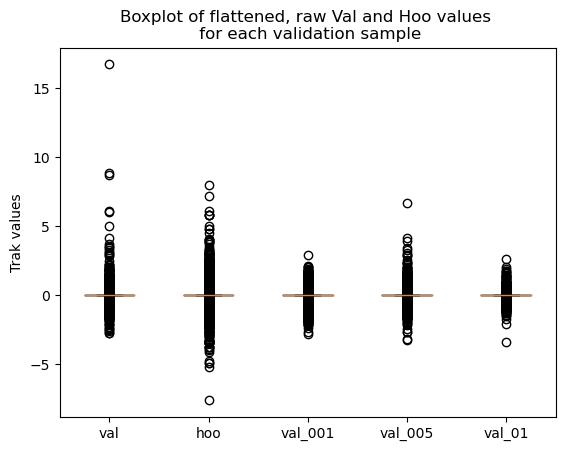

In [21]:
data_to_plot = [val_scores_raw, hoo_scores_raw,val_scores_raw_001,val_scores_raw_005,val_scores_raw_01]

# Create a box plot
plt.boxplot(data_to_plot)

# Customize the plot (optional)
plt.title(f'Boxplot of flattened, raw Val and Hoo values \n for each validation sample')
plt.xticks([1, 2,3,4,5], ['val', 'hoo','val_001','val_005','val_01'])
plt.ylabel('Trak values')

# Show the plot
plt.show()

In [ ]:
plt.savefig('boxplot_full.png')